In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

%matplotlib inline

In [2]:
# Note: Might need to change this path to the data
feature_df = pd.read_csv("../data/gisette_train.data", header=None, sep=" ")
label_df = pd.read_csv("../data/gisette_train.labels", header=None, sep=" ", names=["digit"])

In [3]:
# Show it just to be safe
feature_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,550,0,495,0,0,0,0,976,0,0,...,0,0,991,991,0,0,0,0,983,NaN
1,0,0,0,0,0,0,0,976,0,0,...,475,0,991,0,0,991,0,0,0,NaN
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [4]:
# Does exactly what it looks like
# Note: not actually sure which is 4 and which is 9, couldn't find it in the data
label_df["digit"].replace(-1, "Four", inplace=True)
label_df["digit"].replace(1, "Nine", inplace=True)

# show labels
label_df.head(3)

,digit
0,Nine
1,Four
2,Nine


In [5]:
# Removes last feautre, which seems to be entirely NaN
feature_df = feature_df.iloc[:, :-1]
feature_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Scales all the columns togeather,  so they're within the same range
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(feature_df)
x

array([[ 1.54121954, -0.12304076,  0.94149741, ..., -0.13759497,
        -0.41609101,  2.53952425],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       ...,
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076,  2.3929315 , ..., -0.13759497,
        -0.41609101,  2.56402036]])

In [7]:
# Double check
np.mean(x), np.std(x)

(-2.17544500931884e-19, 0.9954898291795854)

In [8]:
# Now we can use PCA
from sklearn.decomposition import PCA

# n components = 2 because we want to plot it in 2d. 
pca = PCA(n_components=2) # Just creates an instance of a PCA
pca_data = pca.fit_transform(x) # Adds the data
pca_df = pd.DataFrame(data=pca_data, columns=["PC1", "PC2"]) # creates a df with that data

In [9]:
# This show how much of the variance is explained by each principal component: 2.8%, and 2.2%
pca.explained_variance_ratio_

array([0.02883488, 0.02258951])

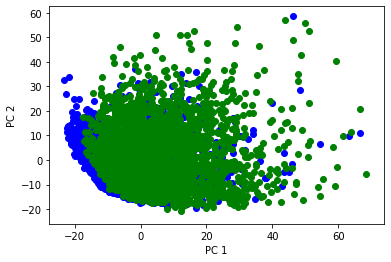

In [15]:
plt.figure()
plt.xlabel("PC 1")
plt.ylabel("PC 2")

targets = ["Nine", "Four"]
colors = ["b", "g"]

for target, color in zip(targets, colors):
        indToKeep = label_df["digit"] == target
        plt.scatter(pca_df.loc[indToKeep, "PC1"],
                    pca_df.loc[indToKeep, "PC2"],
                    c=color)

In [17]:
# According to the data documentation, only half (2500) of the features are related to the data. The rest are 
# "Probes". So, I was expectiont to see 0% PCR after that point. Maybe the .01% we see after is random?

pca2 = PCA().fit(x)
evr = pca2.explained_variance_ratio_
print("\n".join("{:2d}\t{:0.4f}".format(*k) for k in enumerate(evr)))

 0	0.0288
 1	0.0226
 2	0.0166
 3	0.0162
 4	0.0124
 5	0.0114
 6	0.0102
 7	0.0088
 8	0.0072
 9	0.0069
10	0.0065
11	0.0056
12	0.0052
13	0.0049
14	0.0047
15	0.0044
16	0.0040
17	0.0039
18	0.0037
19	0.0036
20	0.0035
21	0.0033
22	0.0033
23	0.0032
24	0.0029
25	0.0029
26	0.0028
27	0.0027
28	0.0027
29	0.0026
30	0.0025
31	0.0024
32	0.0024
33	0.0023
34	0.0022
35	0.0022
36	0.0021
37	0.0021
38	0.0021
39	0.0020
40	0.0020
41	0.0019
42	0.0019
43	0.0019
44	0.0019
45	0.0018
46	0.0018
47	0.0017
48	0.0017
49	0.0017
50	0.0016
51	0.0016
52	0.0016
53	0.0016
54	0.0016
55	0.0015
56	0.0015
57	0.0015
58	0.0014
59	0.0014
60	0.0014
61	0.0014
62	0.0014
63	0.0014
64	0.0013
65	0.0013
66	0.0013
67	0.0013
68	0.0013
69	0.0013
70	0.0013
71	0.0013
72	0.0012
73	0.0012
74	0.0012
75	0.0012
76	0.0012
77	0.0012
78	0.0011
79	0.0011
80	0.0011
81	0.0011
82	0.0011
83	0.0011
84	0.0011
85	0.0011
86	0.0011
87	0.0010
88	0.0010
89	0.0010
90	0.0010
91	0.0010
92	0.0010
93	0.0010
94	0.0010
95	0.0010
96	0.0010
97	0.0010
98	0.0010
99	0.0009


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

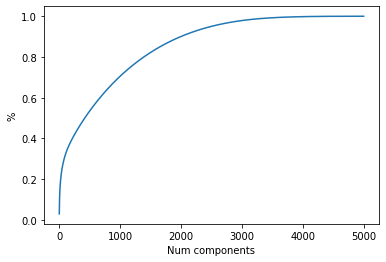

In [18]:
# Same question as above, why do the features above 3500 seem to have some relevance, even though they shouldn't?

plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel("Num components")
plt.ylabel("%")
plt